### Amazon Fine Food Review Analysis

Objective: Determine the review is either positive (4 or 5) or Negative (1 or 2) or Neutral (3) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# As we are dealing with a huge dataset which usually comes in Sequel Lite Database.Therefore,
import sqlite3

#As the Project is on Natural Language Processing
import nltk
import string

# NLP feature Extraction
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer

#For NLP preprocessing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords,words
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Reading Data

##### As this is Sequel Database it cannot be directly called by pandas firts the SQL Connection needs to happen
##### Connecting to SQl

In [2]:
con = sqlite3.connect('database.sqlite')
con

#### Fetching the required Data from SQL
#### As we only want postive and negative reviews.ThereFore,

In [3]:

filtered_data = pd.read_sql_query("""SELECT * FROM REVIEWS WHERE Score !=3 LIMIT 50000""",con)

In [4]:
filtered_data.shape

(50000, 10)

In [5]:
df = filtered_data.copy()

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df['Score'].value_counts(normalize = True)

5    0.68014
4    0.15562
1    0.10358
2    0.06066
Name: Score, dtype: float64

#### Sorting the Data as Positive(1,2) and Negative(4,5) 

In [8]:
def binary(x):
    if x < 3:
        return 0
    else :
        return 1

In [9]:
PositiveNegative = df['Score'].map(binary)
df['Score'] = PositiveNegative
print('Number of data points are :',df.shape)
print('************************'*10)
print(df['Score'].value_counts(normalize = True))
print('\n')
print(df.head())


Number of data points are : (50000, 10)
************************************************************************************************************************************************************************************************************************************************
1    0.83576
0    0.16424
Name: Score, dtype: float64


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      1  1303862400   
1                     0                       0      0  1346976000   
2                     1         

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Sorting The Data in Ascending Order According of ProductId

In [11]:
sorted_data = df.sort_values('ProductId',axis = 0,ascending = True)

In [12]:
sorted_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
22620,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,0,1192060800,made in china,My dogs loves this chicken but its a product f...
22621,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,1,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...
2546,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,1,1282953600,thirty bucks?,Why is this $[...] when the same product is av...
2547,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,1,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...
1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...


#### Checking Null Values in the Data

In [13]:
sorted_data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

No Null Value Found.We can do further Analysis without transforming/removing data points 

#### As we are doing Sentiment Analysis then the similar words in Text Columns will not have any significance as only one.Dropping Duplicates 

In [15]:
final = sorted_data.drop_duplicates(subset = {'UserId','ProfileName','Text'},keep = 'first')

In [16]:
sorted_data.shape

(50000, 10)

In [17]:
final.shape

(46058, 10)

## Text Analytics

### Data Cleaning

In [18]:
sent_0 = final['Text'].values[0]
print(sent_0)
print('='*20)

sent_10 = final['Text'].values[10]
print(sent_10)
print('='*20)

sent_100 = final['Text'].values[100]
print(sent_100)
print('='*20)

sent_200 = final['Text'].values[200]
print(sent_200)
print('='*20)



sent_3000= final['Text'].values[3000]
print(sent_3000)
print('='*20)


sent_4110 = final['Text'].values[4110]
print(sent_4110)
print('='*20)

My dogs loves this chicken but its a product from China, so we wont be buying it anymore.  Its very hard to find any chicken products made in the USA but they are out there, but this one isnt.  Its too bad too because its a good product but I wont take any chances till they know what is going on with the china imports.
I've been trying to find the individual-pack option (at the affordable price) for months now. I love having the ability to know exactly how much creamer I'm using by counting the individual packets. (This product isn't available in my grocery store-- just by the coffee dispensers at local convenience stores.) They're perfect for keeping at my desk at work~~I don't have to use the community fridge, and it doesn't lump up in my coffee like the powdered versions do. It's a little less convenient at home, though, where I'm accustomed to using my refrigerated bottled versions~~opening the little packets one at a time at 5 am can get annoying--but then again, I know exactly ho

In [19]:
import re
sent_0 = re.sub(r"http/S+","",sent_0)
sent_10 = re.sub(r"http/S+","",sent_10)
sent_100 = re.sub(r"http/S+","",sent_100)
sent_3000 = re.sub(r"http/S+","",sent_3000)
sent_4110 = re.sub(r"http/S+","",sent_4110)

In [20]:
#Web Scraping
from bs4 import BeautifulSoup

soup = BeautifulSoup(sent_0, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_10, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_100, 'lxml')
text = soup.get_text()
print(text)
print("="*50)


soup = BeautifulSoup(sent_200, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_3000, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_4110, 'lxml')
text = soup.get_text()
print(text)
print("="*50)




My dogs loves this chicken but its a product from China, so we wont be buying it anymore.  Its very hard to find any chicken products made in the USA but they are out there, but this one isnt.  Its too bad too because its a good product but I wont take any chances till they know what is going on with the china imports.
I've been trying to find the individual-pack option (at the affordable price) for months now. I love having the ability to know exactly how much creamer I'm using by counting the individual packets. (This product isn't available in my grocery store-- just by the coffee dispensers at local convenience stores.) They're perfect for keeping at my desk at work~~I don't have to use the community fridge, and it doesn't lump up in my coffee like the powdered versions do. It's a little less convenient at home, though, where I'm accustomed to using my refrigerated bottled versions~~opening the little packets one at a time at 5 am can get annoying--but then again, I know exactly ho

In [21]:
sent_0 = re.sub('[^A-Za-z]+'," ",sent_0)
print(sent_0)

My dogs loves this chicken but its a product from China so we wont be buying it anymore Its very hard to find any chicken products made in the USA but they are out there but this one isnt Its too bad too because its a good product but I wont take any chances till they know what is going on with the china imports 


In [22]:
def decontracted(phrase):
    phrase = re.sub("don't",'do not',phrase)
    phrase = re.sub("won't",'will not',phrase)
    phrase = re.sub("couldn't",'could not',phrase)
    phrase = re.sub("wouldn't",'would not',phrase)
    phrase = re.sub("it's",'it is',phrase)
    phrase = re.sub("haven't","have not",phrase)
    phrase = re.sub("can't",'can not',phrase)
    phrase = re.sub("hasn't",'has not',phrase)
    phrase = re.sub("shouldn't",'should not',phrase)
    phrase = re.sub("didn't",'did not',phrase)
    
    phrase = re.sub(r"\'s",'is',phrase)
    phrase = re.sub(r"\'re",'are',phrase)
    phrase = re.sub(r"\'ve",'have',phrase)
    phrase = re.sub(r"\'t",'not',phrase)
    phrase = re.sub(r"\'ll",'will',phrase)
    phrase = re.sub(r"\'m",'am',phrase)
    
    return phrase

In [23]:
sent_1 = final['Text'].values[1665]
sent_1

'i always try to feed healthy snacks. My dog does not always like them as much as less healthy snacks.<br />This is the snack that we meet in the middle about.... actually she likes this the best of all her snacks!!!'

In [24]:
decontracted(sent_1)

'i always try to feed healthy snacks. My dog does not always like them as much as less healthy snacks.<br />This is the snack that we meet in the middle about.... actually she likes this the best of all her snacks!!!'

In [25]:
sent_110 = final['Text'].values[1197]
print(sent_110)
print('='*20)

I learned to use Rumford from my Mother.  She could always taste the baking powder if another one was used.  Therefore, we never had Calumet in the house.


In [26]:
import contractions
sent_110 = contractions.fix(sent_110)
print(sent_110)

I learned to use Rumford from my Mother.  She could always taste the baking powder if another one was used.  Therefore, we never had Calumet in the house.


#### Remove StopWords

In [27]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [29]:
stopwords = set(['okey','okay','br','yup','a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 've',
 'very',
 'was',
 'wasn',
 "wasn't",
 'we',
 'were',
 'weren',
 "weren't",
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",'your','yours','yourself','yourselves','aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa',
 'aaaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaargh', 
 'aaaaaaaaaaaaaaaaacccccccckkkkkk', 'aaaaaaaaagghh', 'aaaaaaah', 
 'aaaaaaahhhhhh', 'aaaaaaarrrrrggghhh', 'aaaaaah', 'aaaaaahhh', 
 'aaaaaahhhh', 'aaaaaahhhhh', 'aaaaaahhhhhyaaaaaa', 'aaaaaand', 
 'aaaaaawwwwwwwwww', 'aaaaah', 'aaaaahhhhhhhhhhhhhhhh', 'aaaaallll', 'aaaaawsome', 'aaaah', 
 'aaaahhhhhh', 'aaaahhhhhhhhhhh', 'aaaallll', 'aaaand', 'aaaannnnddd', 'aaaarrrrghh', 'aaagh',
 'aaah', 'aaahhh', 'aaahhhhhh', 'aaahhhs', 'aaahs'])

Applying All the Cleaning Methods on all the Dataset

In [42]:
from tqdm import tqdm

lemm = WordNetLemmatizer()

preprocessed_review = []

for sentence in tqdm(final['Text'].values):
    sentence = re.sub(r"http/S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = contractions.fix(sentence)
    sentence = re.sub('\S\*d\S*', ' ', sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    stopword = set(stopwords.words('english'))
    word_tokens = sentence.split()
    
    word_dictionary = set(words.words())
    
    filtered_sentence = [word for word in word_tokens if word.lower() in word_dictionary]
    lemmatized_sentence = [lemm.lemmatize(word.lower()) for word in filtered_sentence if word.lower() not in stopword]
    sentence = ' '.join(lemmatized_sentence)
    preprocessed_review.append(sentence)

100%|██████████████████████████████████████████████████████████████████████████| 46058/46058 [4:15:30<00:00,  3.00it/s]


Checking the Preprocessed Reviews

In [28]:
import pickle
import joblib

In [29]:
with open('preprocessed_review.pkl', 'rb') as ppr:
    preprocessed_review = pickle.load(ppr)

In [30]:
len(preprocessed_review)   

46058

In [32]:
preprocessed_review[2361]

'dog fed older dog dixie senior version nutritionally dense meat primary ingredient without empty dixie weight easier maintain formula marvelous shiny coat'

In [33]:
preprocessed_review[9100]

'major tea stash premium organic earl grey tea wonderful great flavor great price added benefit getting win win everyone highly'

In [34]:
preprocessed_review[1631]

'anything liver one best expensive weight well worth freeze drying process flavor nutrition'

### Feature Extraction

#### 1. Bag of Words

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
countvec = CountVectorizer()
countvec.fit(preprocessed_review)
print("Some Feature Names :",countvec.get_feature_names()[:10])
print('*'*50)
bow_count = countvec.transform(preprocessed_review)
print("Type of Count Vectorizer :",type(bow_count))
print('The shape of BOW Vectorizer :',bow_count.get_shape())
print('The number of Unique Words :',bow_count.get_shape()[1])

Some Feature Names : ['aa', 'aback', 'abandon', 'abandoned', 'abb', 'abbey', 'abbreviation', 'abdomen', 'abdominal', 'abhor']
**************************************************
Type of Count Vectorizer : <class 'scipy.sparse.csr.csr_matrix'>
The shape of BOW Vectorizer : (46058, 15329)
The number of Unique Words : 15329


In [37]:
#joblib.dump(bow_count,'bow_word.pkl')
bow_count = joblib.load('bow_word.pkl')

In [38]:
bow_count 

<46058x15329 sparse matrix of type '<class 'numpy.int64'>'
	with 1208434 stored elements in Compressed Sparse Row format>

####  2. Bi-Grams N-Gram

In [39]:
#Bi-Gram,Tri-Gram,N-Gram
# The Removal of "not" or any negative words should be avoided in Stopwords while doing Ngram

countvec_bigram = CountVectorizer(ngram_range=(1, 2), min_df=5,max_features = 5000)
final_bigram = countvec_bigram.fit_transform(preprocessed_review)

print("Type of Count Vectorizer:", type(final_bigram))
print('The shape of Bi-Gram Vectorizer:', final_bigram.get_shape())
print('The number of Unique Words include Unigram and Bigram:', final_bigram.get_shape()[1])

print('*' * 20)

countvec_trigram = CountVectorizer(ngram_range=(1, 3), min_df=5,max_features = 5000)
final_trigram = countvec_trigram.fit_transform(preprocessed_review)

print("Type of Count Vectorizer:", type(final_trigram))
print('The shape of N-Gram Vectorizer:', final_trigram.get_shape())
print('The number of Unique Words include Unigram,Bigram and Trigram:', final_trigram.get_shape()[1])



Type of Count Vectorizer: <class 'scipy.sparse.csr.csr_matrix'>
The shape of Bi-Gram Vectorizer: (46058, 5000)
The number of Unique Words include Unigram and Bigram: 5000
********************
Type of Count Vectorizer: <class 'scipy.sparse.csr.csr_matrix'>
The shape of N-Gram Vectorizer: (46058, 5000)
The number of Unique Words include Unigram,Bigram and Trigram: 5000


In [40]:
#joblib.dump(bow_count,'final_bigram.pkl')
final_bigram = joblib.load('final_bigram.pkl')
#joblib.dump(bow_count,'final_trigram.pkl')
final_trigram = joblib.load('final_trigram.pkl')

#### TF-IDF Vectorizer

In [41]:
#TF-IDF Vectorizer
tfidf = TfidfVectorizer(ngram_range = (1,2),min_df = 5)
tfidf.fit(preprocessed_review)
print("Some of the Unique Words in Corpus:",tfidf.get_feature_names()[:10])
tfidf_count = tfidf.transform(preprocessed_review)
print('*' * 20)

print("Type of Count Vectorizer:", type(tfidf_count))
print('The shape of Tf-idfVectorizer:', tfidf_count.get_shape())
print('The number of Unique Word in Tf-idf Vectorizer:', tfidf_count.get_shape()[1])



Some of the Unique Words in Corpus: ['aa', 'aback', 'abandon', 'abandoned', 'abdominal', 'ability', 'ability buy', 'able', 'able add', 'able afford']
********************
Type of Count Vectorizer: <class 'scipy.sparse.csr.csr_matrix'>
The shape of Tf-idfVectorizer: (46058, 50684)
The number of Unique Word in Tf-idf Vectorizer: 50684


In [42]:
#joblib.dump(bow_count,'tfidf_count.pkl')
tfidf_count = joblib.load('tfidf_count.pkl')

In [87]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
22620,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,0,1192060800,made in china,My dogs loves this chicken but its a product f...
22621,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,1,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...
2546,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,1,1282953600,thirty bucks?,Why is this $[...] when the same product is av...
2547,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,1,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...
1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...


## Model Building

In [44]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix
from sklearn import metrics
from tqdm import tqdm

rf = RandomForestClassifier(max_features = 'sqrt')


In [45]:
X = preprocessed_review
y = np.array(final['Score'])
X1,X_test,y1,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)
X_train,X_cv,y_train,y_cv = train_test_split(X1,y1,test_size = 0.3,random_state = 101)

In [46]:
y_test

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### Random Forest on Bag of Words

#### Converting The Training,Testing and Cross Val Data into Bag of Words

In [47]:

count_vec = CountVectorizer(min_df=10,max_features=5000)
X_train_bow = count_vec.fit_transform(X_train)
X_cv_bow = count_vec.transform(X_cv)
X_test_bow = count_vec.transform(X_test)

scaler = StandardScaler(with_mean = False)
X_train_bow = scaler.fit_transform(X_train_bow)
X_cv_bow  = scaler.transform(X_cv_bow)
X_test_bow   = scaler.transform(X_test_bow)

In [48]:
X_train_bow.shape

(22568, 3940)

In [49]:
estimators = [10,20,50,100,120]
depth = [5,10,50,100,500,1000]

In [50]:
param_grids = {'n_estimators': estimators,'max_depth': depth,'criterion' : ['gini','entropy']}
rscv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grids,
    cv=KFold(n_splits=5, shuffle=True),  # Use KFold instead of StratifiedKFold
    n_jobs=-1,
    scoring='roc_auc',
    verbose=2
)
rscv.fit(X_train_bow, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(max_features='sqrt'),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 50, 100, 500,
                                                      1000],
                                        'n_estimators': [10, 20, 50, 100, 120]},
                   scoring='roc_auc', verbose=2)

In [69]:
rscv.best_params_

{'n_estimators': 100, 'max_depth': 500, 'criterion': 'entropy'}

In [51]:
rf = RandomForestClassifier(n_estimators =120,max_depth = 500,max_features = 'sqrt',
                           n_jobs = -1,criterion ='gini')
rf.fit(X_train_bow,y_train)

RandomForestClassifier(max_depth=500, max_features='sqrt', n_estimators=120,
                       n_jobs=-1)

In [52]:
#As the Classification Report is unable to process.Therefore,
X = []
Y = []
Z = []
Zt =[]

for es in estimators:
    for d in depth :
        rf = RandomForestClassifier(n_estimators = es ,max_depth = d,max_features = 'sqrt',
                            n_jobs = -1)
        rf.fit(X_train_bow,y_train)
        pred = rf.predict_proba(X_cv_bow)[:,1]
        predt = rf.predict_proba(X_train_bow)[:,1]
        X.append(es)
        Y.append(d)
        Z.append(roc_auc_score(y_cv,pred))
        Zt.append(roc_auc_score(y_train,predt))

In [54]:
Rf_Heatmap_values = joblib.load('Rf_Heatmap_values_bow.pkl')

In [57]:
Rf_Heatmap_values = {'X':X,'Y':Y,'Z':Z,'Zt':Zt}

### Heatmap for Cross Validation Data 

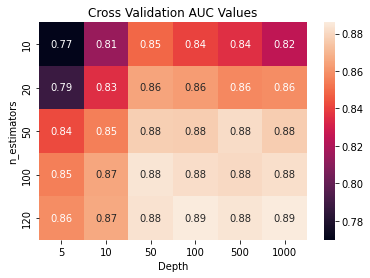

In [58]:
data_cv = pd.DataFrame({'n_estimators': X,'Depth':Y,'AUC':Z})
data_pivoted_cv = data_cv.pivot('n_estimators','Depth','AUC')
sns.heatmap(data_pivoted_cv,annot = True)
plt.title("Cross Validation AUC Values")
plt.show()

### Heatmap for Cross Training Data 

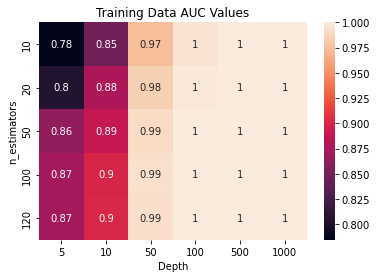

In [59]:
data_train = pd.DataFrame({'n_estimators': X,'Depth':Y,'AUC':Zt})
data_pivoted_train = data_train.pivot('n_estimators','Depth','AUC')
sns.heatmap(data_pivoted_train,annot = True)
plt.title("Training Data AUC Values")
plt.show()

#### As model tends to overfit in estimator = 120 and max_depth = 1000,Therefore by trial and error the values are chosen

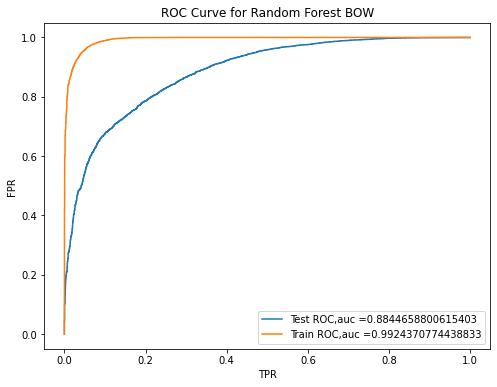

In [60]:

rf = RandomForestClassifier(n_estimators = 100,max_depth = 50,max_features = 'sqrt',
                            n_jobs = -1,criterion ='gini')
rf.fit(X_train_bow,y_train)
y_pred_test = rf.predict_proba(X_test_bow)[:,1]
y_pred_train = rf.predict_proba(X_train_bow)[:,1]
fpr1,tpr1,threshold_test = metrics.roc_curve(y_test,y_pred_test)
fpr2,tpr2,threshold_train = metrics.roc_curve(y_train,y_pred_train)
plt.figure(figsize = (8,6))
plt.plot(fpr1,tpr1,label = 'Test ROC,auc ='+str(roc_auc_score(y_test,y_pred_test)))
plt.plot(fpr2,tpr2,label = 'Train ROC,auc ='+str(roc_auc_score(y_train,y_pred_train)))
plt.title('ROC Curve for Random Forest BOW')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.legend()
plt.show()

### Confusion Matrix For Training Data of Random Forest Bag of Words

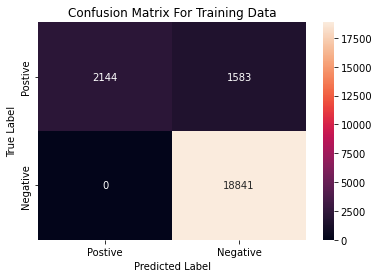

In [68]:
pred_train = rf.predict(X_train_bow)
con_mat_train = confusion_matrix(y_train,pred_train)
class_label = ['Postive','Negative']
con_data_train = pd.DataFrame(con_mat_train,index = class_label,columns = class_label)
sns.heatmap(con_data_train,annot = True,fmt = 'd')
plt.title('Confusion Matrix For Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [69]:
con_data_train

,Postive,Negative
Postive,2144,1583
Negative,0,18841


### Confusion Matrix For Test Data of Random Forest Bag of Words

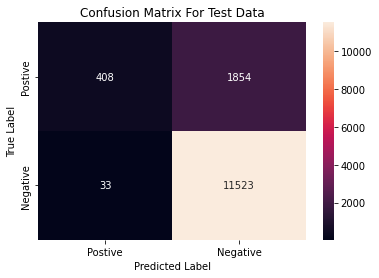

In [70]:
pred_test = rf.predict(X_test_bow)
con_mat_test = confusion_matrix(y_test,pred_test)
class_label = ['Postive','Negative']
con_data_test = pd.DataFrame(con_mat_test,index = class_label,columns = class_label)
sns.heatmap(con_data_test,annot = True,fmt = 'd')
plt.title('Confusion Matrix For Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [71]:
con_data_test

,Postive,Negative
Postive,408,1854
Negative,33,11523


In [73]:
con_data_cv

,Postive,Negative
Postive,324,1278
Negative,34,8036


## Random Forest Model with TFIDF Technique

In [70]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=5)
X_train_tf = tfidf.fit_transform(X_train)
X_cv_tf = tfidf.transform(X_cv)
X_test_tf = tfidf.transform(X_test)

scalar = StandardScaler(with_mean=False)
X_train_tf = scalar.fit_transform(X_train_tf)
X_test_tf= scalar.transform(X_test_tf)
X_cv_tf=scalar.transform(X_cv_tf)


In [71]:
depth = [50,100,200,300,500,1000]
estimators = [5,10,20,40,100,120,150]

### Model Hyperparameter Tuning with RandomizedSearchCV

In [73]:
rf_tf = RandomForestClassifier(max_features='sqrt')
param_grid_tf = [{'n_estimators': estimators,'max_depth' : depth}]

rscv_tf = RandomizedSearchCV(estimator = rf,
    param_distributions = param_grid_tf,
    n_jobs = -1,verbose = 3,
    cv = KFold(n_splits=5,random_state = 56,shuffle=True))
rscv_tf.fit(X_train_tf,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=56, shuffle=True),
                   estimator=RandomForestClassifier(max_depth=50,
                                                    max_features='sqrt',
                                                    n_jobs=-1),
                   n_jobs=-1,
                   param_distributions=[{'max_depth': [50, 100, 200, 300, 500,
                                                       1000],
                                         'n_estimators': [5, 10, 20, 40, 100,
                                                          120, 150]}],
                   verbose=3)

In [74]:
rscv_tf.best_params_

{'n_estimators': 20, 'max_depth': 500}

In [75]:
X = []
Y = []
Z = []
Zt = []

for es in estimators:
    for d in depth :
        rf = RandomForestClassifier(n_estimators = es ,max_depth = d,max_features = 'sqrt',
                            n_jobs = -1)
        rf.fit(X_train_bow,y_train)
        pred = rf.predict_proba(X_cv_bow)[:,1]
        predt = rf.predict_proba(X_train_bow)[:,1]
        X.append(es)
        Y.append(d)
        Z.append(roc_auc_score(y_cv,pred))
        Zt.append(roc_auc_score(y_train,predt))

In [77]:
with open('Rf_Heatmap_values_tf.pkl','rb') as rf_tf:
    data_heat_tf = pickle.load(rf_tf)

In [78]:
X = data_heat_tf['X']
Y = data_heat_tf['Y']
Z = data_heat_tf['Z']
Zt = data_heat_tf['Zt']

### Heatmap For Training Data of Random Forest TFIDF

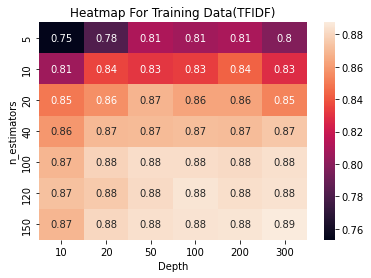

In [80]:
data_tf = pd.DataFrame({'n_estimators': X,'Depth' :Y,'AUC': Z})
data_pivot = data_tf.pivot('n_estimators','Depth','AUC')
sns.heatmap(data_pivot,annot = True)
plt.title('Heatmap For Training Data(TFIDF)')
plt.show()

### Heatmap For Cross Validation Data of Random Forest TFIDF

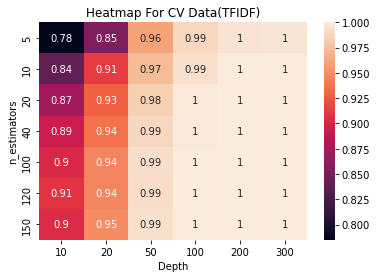

In [81]:
data_tf = pd.DataFrame({'n_estimators': X,'Depth':Y,'AUC':Zt})
data_pivot_tf = data_tf.pivot('n_estimators','Depth','AUC')
sns.heatmap(data_pivot_tf,annot = True)
plt.title('Heatmap For CV Data(TFIDF)')
plt.show()

## ROC Curve for the Random Forest with TFIDF

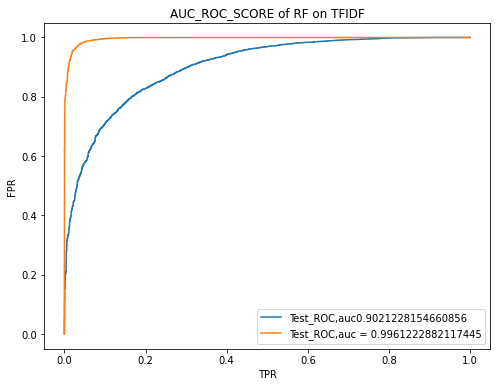

In [82]:
rf_tf = RandomForestClassifier(n_estimators = 120,max_depth = 50, max_features = 'sqrt',
                            n_jobs = -1)
rf_tf.fit(X_train_tf,y_train)

y_pred_test = rf_tf.predict_proba(X_test_tf)[:,1]
y_pred_train = rf_tf.predict_proba(X_train_tf)[:,1]

fpr1,tpr1,threshold1 = metrics.roc_curve(y_test,y_pred_test)
fpr2,tpr2,threshold2 = metrics.roc_curve(y_train,y_pred_train)
plt.figure(figsize = (8,6))
plt.plot(fpr1,tpr1,label = 'Test_ROC,auc' +str(roc_auc_score(y_test,y_pred_test)))
plt.plot(fpr2,tpr2,label = 'Test_ROC,auc = ' +str(roc_auc_score(y_train,y_pred_train)))
plt.title("AUC_ROC_SCORE of RF on TFIDF")
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.legend()
plt.show()

In [65]:
y_train

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

### Confusion Matrix For Training Data of Random Forest TFIDF

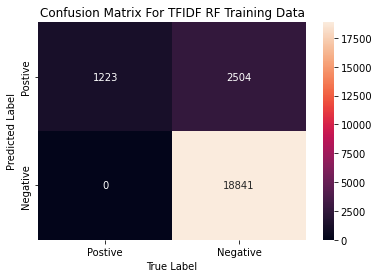

In [83]:
pred_train = rf_tf.predict(X_train_tf)
con_mat_train = confusion_matrix(y_train,pred_train)
label = ['Postive','Negative']
con_mat_data = pd.DataFrame(con_mat_train,index = label,columns = label)
sns.heatmap(con_mat_data,annot = True,fmt = 'd')
plt.title('Confusion Matrix For TFIDF RF Training Data')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

### Confusion Matrix For Training Data of Random Forest TFIDF

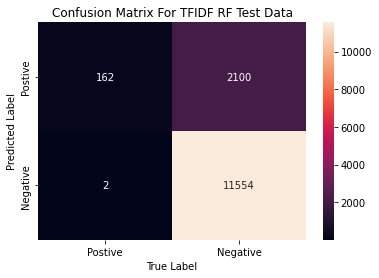

In [84]:
pred_test = rf_tf.predict(X_test_tf)
con_mat_test = confusion_matrix(y_test,pred_test)
label = ['Postive','Negative']
con_mat_data = pd.DataFrame(con_mat_test,index = label,columns = label)
sns.heatmap(con_mat_data,annot = True,fmt = 'd')
plt.title('Confusion Matrix For TFIDF RF Test Data')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

# Logistic Regression

### Applying Logistic Regression For BOW with L1 Penalty

In [88]:
#Inverse of regularization strength; must be a positive float. 
#Like in support vector machines,smaller values specify stronger regularization.
C = [0.001,0.01,0.1,1,10,100]
solver = ['liblinear','sag','saga']
param_grid = {'solver':solver,'C':C}

### Hyperparameter Tuning with  RandomizedSearchCV on Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l1')
rscv_bow = RandomizedSearchCV(estimator = lr,
                              param_distributions = param_grid,
                              cv = KFold(n_splits = 5,shuffle = True,random_state =46),
                              n_jobs = -1,verbose = 1)
rscv_bow.fit(X_train_bow,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=46, shuffle=True),
                   estimator=LogisticRegression(penalty='l1'), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'solver': ['liblinear', 'sag', 'saga']},
                   verbose=1)

In [90]:
rscv_bow.best_params_

{'solver': 'saga', 'C': 0.1}

In [91]:
auc_train = []
auc_cv = []
for c in C:
    lr = LogisticRegression(penalty = 'l1',C = c,solver = 'saga')
    lr.fit(X_train_bow,y_train)
    predtr = lr.predict_proba(X_train_bow)[:,1]
    predcv = lr.predict_proba(X_cv_bow)[:,1]
    auc_train.append(roc_auc_score(y_train,predtr))
    auc_cv.append(roc_auc_score(y_cv,predcv))   

In [ ]:
auc_cv

### AUC VS Hyperparamter

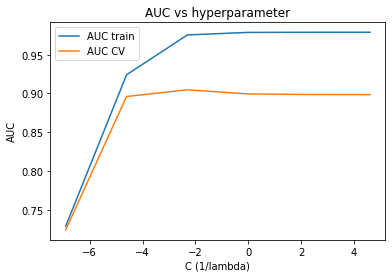

optimal lambda for which auc is maximum :  9.0


In [114]:
import math

#Optimal C will be where The AUC value is max.Fetching Value of C from where Auc Value is Max.
optimal_c= C[auc_cv.index(max(auc_cv))]

#Converting values of C into logarithm
#1.Converting to the logarithmic scale can reduce the sensitivity of the model to minor changes in C.
#2.The logarithmic scale allows you to explore both small and large values of C in a more evenly spaced manner.

C=[math.log(x) for x in C]

#Plotting the AUC Vs Hyperparamter 
fig = plt.figure()

plt.plot(C, auc_train, label='AUC train')
plt.plot(C, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C (1/lambda)')
plt.ylabel('AUC')
plt.legend()
plt.show()
print('optimal lambda for which auc is maximum : ',1//optimal_c)

### Loading the LR model with Optimal_C found and Predicting Probabilities with Lasso Regularization

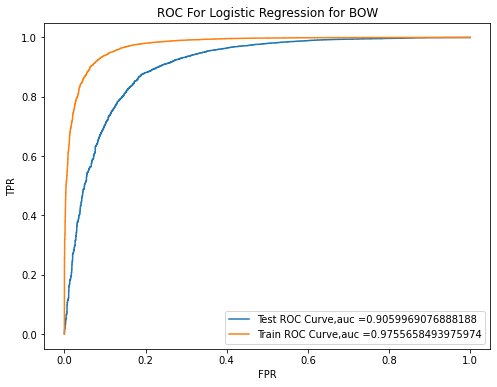

In [121]:
lr = LogisticRegression(penalty = 'l1',C = optimal_c,solver = 'saga')
lr.fit(X_train_bow,y_train)
pred = lr.predict_proba(X_test_bow)[:,1]
predt = lr.predict_proba(X_train_bow)[:,1]
fpr1,tpr1,threshold1 = metrics.roc_curve(y_test,pred)
fpr2,tpr2,threshold2 = metrics.roc_curve(y_train,predt)

#Plotting The ROC(Receiver Operating Characteristic) AUC Curve

plt.figure(figsize = (8,6))
plt.plot(fpr1,tpr1,label = 'Test ROC Curve,auc ='+ str(roc_auc_score(y_test,pred)))
plt.plot(fpr2,tpr2,label = 'Train ROC Curve,auc ='+ str(roc_auc_score(y_train,predt)))
plt.title('ROC For Logistic Regression for BOW')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [ ]:
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [132]:
auc_train = []
auc_cv = []
for c in C:
    lr = LogisticRegression(penalty = 'l2',C = c,solver = 'saga')
    lr.fit(X_train_bow,y_train)
    predtr = lr.predict_proba(X_train_bow)[:,1]
    predcv = lr.predict_proba(X_cv_bow)[:,1]
    auc_train.append(roc_auc_score(y_train,predtr))
    auc_cv.append(roc_auc_score(y_cv,predcv))   

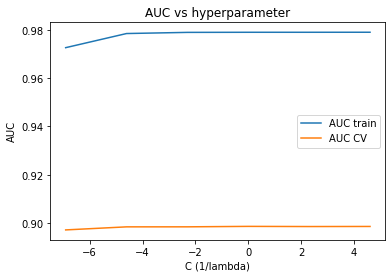

optimal lambda for which auc is maximum :  1


In [133]:
import math

#Optimal C will be where The AUC value is max.Fetching Value of C from where Auc Value is Max.
optimal_c= C[auc_cv.index(max(auc_cv))]

#Converting values of C into logarithm
#1.Converting to the logarithmic scale can reduce the sensitivity of the model to minor changes in C.
#2.The logarithmic scale allows you to explore both small and large values of C in a more evenly spaced manner.

C_log=[math.log(x) for x in C]

#Plotting the AUC Vs Hyperparamter 
fig = plt.figure()

plt.plot(C_log, auc_train, label='AUC train')
plt.plot(C_log, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C (1/lambda)')
plt.ylabel('AUC')
plt.legend()
plt.show()
print('optimal lambda for which auc is maximum : ',1//optimal_c)

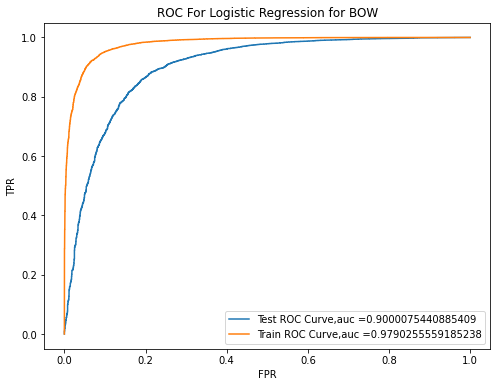

In [134]:
# Loading the LR model with Optimal_C found and Predicting Probabilities with L2 Rigde Regularization

lr = LogisticRegression(penalty = 'l2',C = optimal_c,solver = 'saga')
lr.fit(X_train_bow,y_train)
pred = lr.predict_proba(X_test_bow)[:,1]
predt = lr.predict_proba(X_train_bow)[:,1]
fpr1,tpr1,threshold1 = metrics.roc_curve(y_test,pred)
fpr2,tpr2,threshold2 = metrics.roc_curve(y_train,predt)

#Plotting The ROC(Receiver Operating Characteristic) AUC Curve

plt.figure(figsize = (8,6))
plt.plot(fpr1,tpr1,label = 'Test ROC Curve,auc ='+ str(roc_auc_score(y_test,pred)))
plt.plot(fpr2,tpr2,label = 'Train ROC Curve,auc ='+ str(roc_auc_score(y_train,predt)))
plt.title('ROC For Logistic Regression for BOW')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [127]:
#But there is not much difference between The ROC Score of L1 and L2.

In [135]:
#Inverse of regularization strength; must be a positive float. 
#Like in support vector machines,smaller values specify stronger regularization.
C = [0.001,0.01,0.1,1,10,100]
solver = ['liblinear','sag','saga']
param_grid = {'solver':solver,'C':C}

In [137]:
auc_train = []
auc_cv = []
for c in C:
    lr = LogisticRegression(penalty = 'elasticnet',C = c,solver = 'saga',l1_ratio = 0.5)
    lr.fit(X_train_bow,y_train)
    predtr = lr.predict_proba(X_train_bow)[:,1]
    predcv = lr.predict_proba(X_cv_bow)[:,1]
    auc_train.append(roc_auc_score(y_train,predtr))
    auc_cv.append(roc_auc_score(y_cv,predcv))   

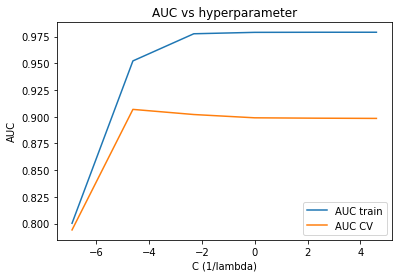

optimal lambda for which auc is maximum :  99.0


In [138]:
import math

#Optimal C will be where The AUC value is max.Fetching Value of C from where Auc Value is Max.
optimal_c= C[auc_cv.index(max(auc_cv))]

#Converting values of C into logarithm
#1.Converting to the logarithmic scale can reduce the sensitivity of the model to minor changes in C.
#2.The logarithmic scale allows you to explore both small and large values of C in a more evenly spaced manner.

C_log=[math.log(x) for x in C]

#Plotting the AUC Vs Hyperparamter 
fig = plt.figure()

plt.plot(C_log, auc_train, label='AUC train')
plt.plot(C_log, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C (1/lambda)')
plt.ylabel('AUC')
plt.legend()
plt.show()
print('optimal lambda for which auc is maximum : ',1//optimal_c)

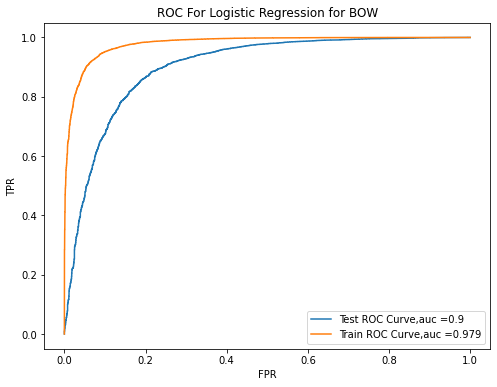

In [145]:
# Loading the LR model with Optimal_C found and Predicting Probabilities with ElasticNet Regularization

lr = LogisticRegression(penalty = 'elasticnet',C = c,solver = 'saga',l1_ratio = 0.5)
lr.fit(X_train_bow,y_train)
pred = lr.predict_proba(X_test_bow)[:,1]
predt = lr.predict_proba(X_train_bow)[:,1]
fpr1,tpr1,threshold1 = metrics.roc_curve(y_test,pred)
fpr2,tpr2,threshold2 = metrics.roc_curve(y_train,predt)

#Plotting The ROC(Receiver Operating Characteristic) AUC Curve

plt.figure(figsize = (8,6))
plt.plot(fpr1,tpr1,label = 'Test ROC Curve,auc ='+ str(round(roc_auc_score(y_test, pred), 3)))
plt.plot(fpr2,tpr2,label = 'Train ROC Curve,auc ='+ str(round(roc_auc_score(y_train, predt), 3)))
plt.title('ROC For Logistic Regression for BOW')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [ ]:
pred_test = rf_tf.predict(X_test_tf)
con_mat_test = confusion_matrix(y_test,pred_test)
label = ['Postive','Negative']
con_mat_data = pd.DataFrame(con_mat_test,index = label,columns = label)
sns.heatmap(con_mat_data,annot = True,fmt = 'd')
plt.title('Confusion Matrix For Logistic Regression BOW Test Data')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()



In [164]:
importance = lr.coef_[0] 
feature_names = count_vec.get_feature_names_out()
features_importance = list(zip(feature_names, importance))
top_features_importance = sorted(features_importance, key=lambda x: x[1], reverse=True)
# Get the indices that sort the importance array in descending order
top_10_indices = np.argsort(importance)[::-1][:10]

top_n = 20
top_positive_features = [feature for feature, importance in top_features_importance[:top_n] if importance > 0]
top_negative_features = [feature for feature, importance in top_features_importance[-top_n:] if importance < 0]

print("Top ten positive words:")
print(top_positive_features)
print("\nTop ten negative words:")
print(top_negative_features)

Top ten positive words:
['great', 'love', 'best', 'good', 'delicious', 'excellent', 'perfect', 'nice', 'highly', 'wonderful', 'favorite', 'easy', 'smooth', 'tasty', 'find', 'snack', 'amazing', 'yummy', 'keep', 'thanks']

Top ten negative words:
['maybe', 'refund', 'money', 'cheap', 'guess', 'bland', 'threw', 'yuck', 'thought', 'would', 'return', 'weak', 'waste', 'awful', 'unfortunately', 'horrible', 'disappointing', 'terrible', 'disappointed', 'worst']
